# Challenge: Promotions

In this challenge, you'll develop codes to parse and analyze data returned from another API on Zalando such as [Promos homme (Men's Promotions)
](https://www.zalando.fr/promo-homme/) or [Promos femme (Women's Promotions)](https://www.zalando.fr/promo-femme/). The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [41]:
# your code here
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize

url='https://api.tibiadata.com/v2/highscores/Refugia.json'

## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [42]:
# your code here
response = requests.get(url)
response

<Response [200]>

In [58]:
api = response.json()
api

{'highscores': {'filters': {'world': 'Refugia',
   'category': 'experience',
   'vocation': 'all'},
  'data': [{'name': 'Trababomba',
    'rank': 1,
    'world': 'Refugia',
    'vocation': 'Elder Druid',
    'points': 33278225007,
    'level': 1261},
   {'name': 'Magiczny',
    'rank': 2,
    'world': 'Refugia',
    'vocation': 'Master Sorcerer',
    'points': 31756548442,
    'level': 1241},
   {'name': 'Seph Agark',
    'rank': 3,
    'world': 'Refugia',
    'vocation': 'Master Sorcerer',
    'points': 26739637775,
    'level': 1172},
   {'name': 'Rzeznik Nija',
    'rank': 4,
    'world': 'Refugia',
    'vocation': 'Master Sorcerer',
    'points': 25792383633,
    'level': 1158},
   {'name': 'Benboozled',
    'rank': 5,
    'world': 'Refugia',
    'vocation': 'Elder Druid',
    'points': 23229464591,
    'level': 1119},
   {'name': 'Macler',
    'rank': 6,
    'world': 'Refugia',
    'vocation': 'Elite Knight',
    'points': 22709244392,
    'level': 1110},
   {'name': 'Haraster',
 

In [66]:
api = response.json()['highscores']['data']
df = pd.DataFrame(api)

In [68]:
df.head()

,name,rank,world,vocation,points,level
0,Trababomba,1,Refugia,Elder Druid,33278225007,1261
1,Magiczny,2,Refugia,Master Sorcerer,31756548442,1241
2,Seph Agark,3,Refugia,Master Sorcerer,26739637775,1172
3,Rzeznik Nija,4,Refugia,Master Sorcerer,25792383633,1158
4,Benboozled,5,Refugia,Elder Druid,23229464591,1119


## Bonus

Extract the following information from the data:

* The trending brand.

* The product(s) with the highest discount.

* The sum of discounts of all goods (sum_discounted_prices divided by sum_original_prices).

In [69]:
df['vocation'].unique()

array(['Elder Druid', 'Master Sorcerer', 'Elite Knight', 'Royal Paladin',
       'Knight', 'Druid', 'Paladin', 'Sorcerer'], dtype=object)

The vocation with more highscore players is the Elite Knight, followed by the Elder Druid and in third place the Royal Paladin

In [91]:
df['vocation'].value_counts()[:3]

Elite Knight     296
Elder Druid      234
Royal Paladin    233
Name: vocation, dtype: int64

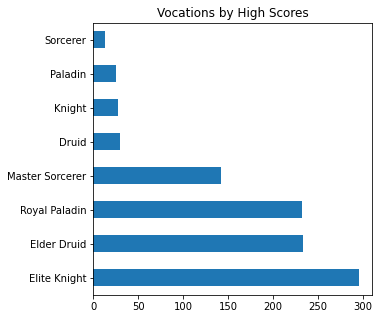

In [97]:
df['vocation'].value_counts().plot(kind='barh', figsize=(5,5), title='Vocations by High Scores')

Top 3 highest levels of each vocation

In [120]:
df[(df['vocation'] == 'Elite Knight')& (df['level']>1000)].head(3)

,name,rank,world,vocation,points,level
5,Macler,6,Refugia,Elite Knight,22709244392,1110
6,Haraster,7,Refugia,Elite Knight,22182330043,1101
7,Luciifera,8,Refugia,Elite Knight,21972173107,1098


In [119]:
df[(df['vocation'] == 'Elder Druid')& (df['level']>1000)].head(3)

,name,rank,world,vocation,points,level
0,Trababomba,1,Refugia,Elder Druid,33278225007,1261
4,Benboozled,5,Refugia,Elder Druid,23229464591,1119
11,Mordownica,12,Refugia,Elder Druid,20786854553,1078


In [121]:
df[(df['vocation'] == 'Royal Paladin')& (df['level']>1000)].head(3)

,name,rank,world,vocation,points,level
8,Szulcek,9,Refugia,Royal Paladin,21817567675,1095
9,Hommed Montana,10,Refugia,Royal Paladin,21751716892,1094
20,Jason Fireheart,21,Refugia,Royal Paladin,16876166478,1006


In [122]:
df[(df['vocation'] == 'Master Sorcerer')& (df['level']>1000)].head(3)

,name,rank,world,vocation,points,level
1,Magiczny,2,Refugia,Master Sorcerer,31756548442,1241
2,Seph Agark,3,Refugia,Master Sorcerer,26739637775,1172
3,Rzeznik Nija,4,Refugia,Master Sorcerer,25792383633,1158


Relation between the top highscore profesion Elite Knight and the Elder Druid, Royal Paladin and Master Sorcerer

In [146]:
EK = df['vocation'].value_counts()['Elite Knight']
ED = df['vocation'].value_counts()['Elder Druid']
RP = df['vocation'].value_counts()['Royal Paladin']
MS = df['vocation'].value_counts()['Master Sorcerer']

In [147]:
print('Elite Knight vs Elder Druid: '+ str(round(ED/EK,2)*100)+'%')
print('Elite Knight vs Royal Paladin: '+ str(round(RP/EK,2)*100)+'%')
print('Elite Knight vs Royal Paladin: '+ str(round(MS/EK,2)*100)+'%')

Elite Knight vs Elder Druid: 79.0%
Elite Knight vs Royal Paladin: 79.0%
Elite Knight vs Royal Paladin: 48.0%
